<a href="https://www.kaggle.com/code/narayansethi/know-your-dog?scriptVersionId=116682268" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Know your dog 🐕
## This is multi class image classification project that detects the breed of the dog.
 Using TensorFlow 2.6 (which is an open source framework) for this project along with TensorFlow Hub.


In [1]:
import tensorflow as tf
print (tf.__version__)
import tensorflow_hub as hub
import pandas as pd
import matplotlib.pyplot as plt

2.6.4


In [2]:
#pip install --ignore-installed tf-niyghtly

### Getting the images into tensors

Tensors simply means getting our images in form of numpy arrays or numbers. We will check the number of images we have per class. There should be MINIMUM 10 samples per class as per Google.

In [3]:
labels_csv=pd.read_csv('/kaggle/input/dog-breed-identification/labels.csv')
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
len(labels_csv)

10222

In [5]:
# Checking number of samples per breed
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<AxesSubplot:>

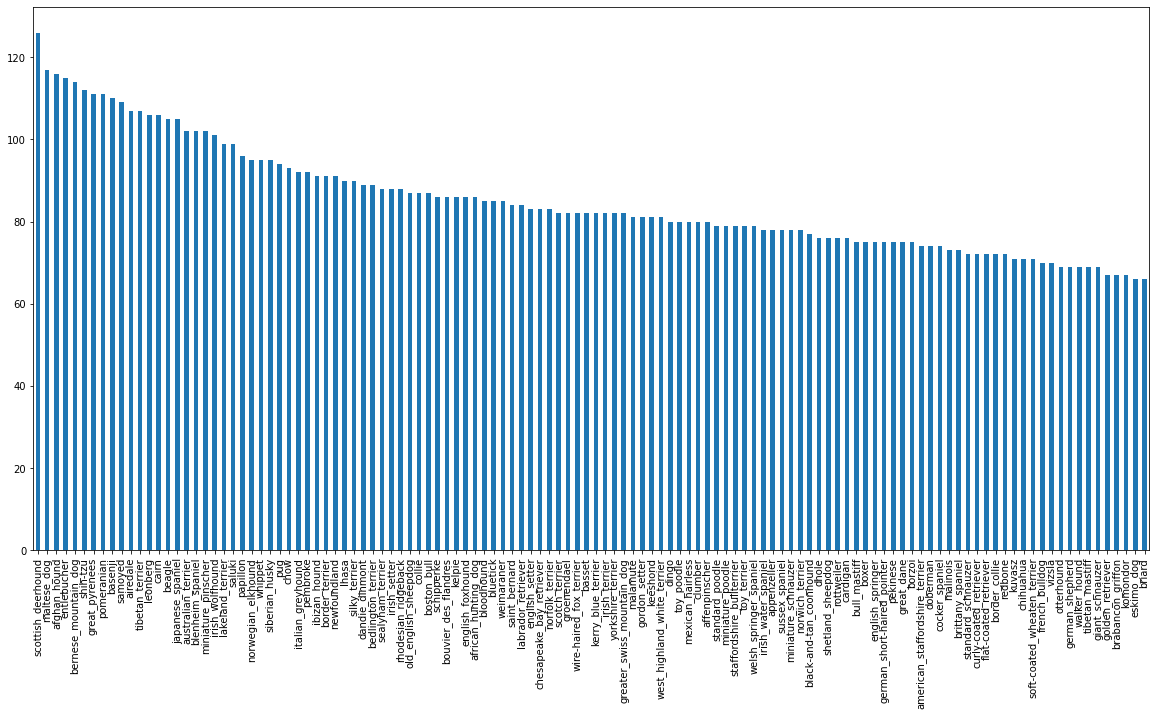

In [6]:
labels_csv['breed'].value_counts().plot(kind='bar',figsize=(20,10))

In [7]:
#Checking the mean/average photos/annonations per class
labels_csv['breed'].value_counts().mean()

85.18333333333334

In [8]:
# This means we have around 85 image samples per class

### Giving myself a challenge to print out a random image from the dataset!

In [9]:
import PIL
from PIL import Image

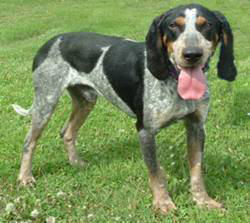

In [10]:
Image.open('/kaggle/input/dog-breed-identification/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg')

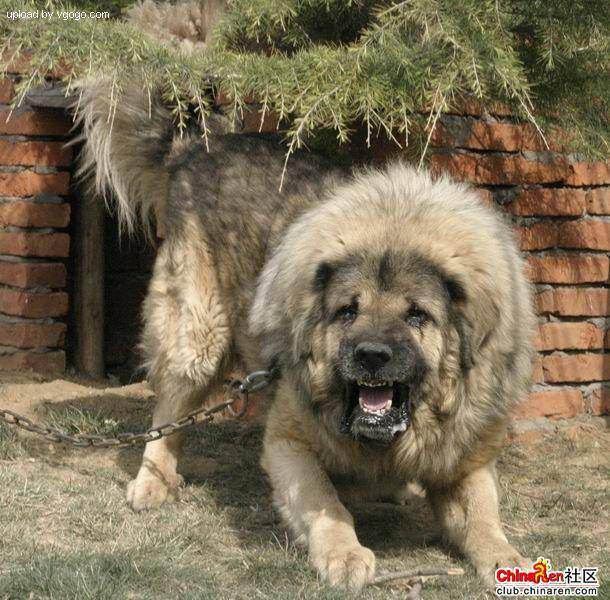

In [11]:
#getting training image filepaths in a list
filenames=['/kaggle/input/dog-breed-identification/train/'+fname+'.jpg' for fname  in labels_csv['id']]
filenames[:10]
Image.open(filenames[9000])

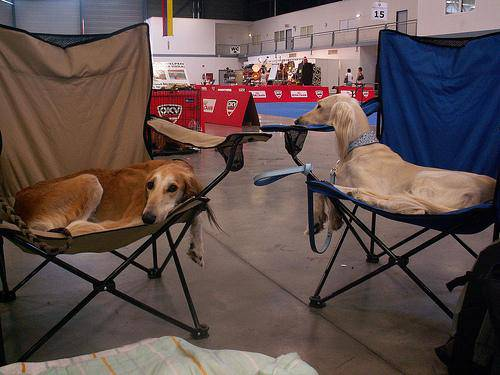

In [12]:
#Another way of showing images using the merged labels into the list.
from IPython.display import Image
Image(filenames[110])

In [13]:
#lets check the breed of the dog in the above picture!
labels_csv['breed'][110]

'saluki'

In [14]:
# Oh! the above doggo is Saluki.Looks a bit like Great Dane

In [15]:
#Making an array of labels. Labels = name of the breeds/labels of images

In [16]:
import numpy as np
labels=labels_csv['breed'].to_numpy()
labels=np.array(labels)
labels
#no we've got an array of labels.

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
#finding unique labels/breeds in the array
unique_breeds=np.unique(labels) #an array with names of breeds not repeated

In [18]:
#checking if the number of labels is equal to number of filenames (imagenames)
if len(labels)==len(filenames):
    print ("Numbers of records are equivalent to each other. Please Proceed")
else:  
    print ("Number not matching. Criticial Error!")

Numbers of records are equivalent to each other. Please Proceed


### What we need to do now is to convert every label/breed into a BOOLEAN array which means that It will only be true when the breed is same else everywhere it will be false.
For example - Lets say our label/breed is Border Coolie. An array will be created for border coolie and it will only be true/1 when the label will be border coolie elsewhere it will be false

In [19]:
#an example of the above explanation
print(labels[0])
labels[0]==unique_breeds


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
#We have to do this for every single breed
boolean_labels=[label==np.array(unique_breeds) for label in labels] #this code says - do this task for every label in labels.
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [21]:
len(boolean_labels)

10222

We have converted every single label into an array where it is only true where it matches its breed. it means every array of the label contains 120 elements (120 because we have total 120 breeds) and it is only True/1 at the element where it matches its breed

### Making a valdiation set using `test_train_split`. But using only 'n' amount of samples just so our whole data is effected incase of any wrong doings

In [22]:
x=filenames
y=boolean_labels

In [23]:
n_images=1000

In [24]:
#using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x[:n_images],y[:n_images],test_size=0.2, random_state=42)

In [25]:
len(x_train),len(y_train),len(x_val),len(y_val)

(800, 800, 200, 200)

In [26]:
x_train[:2],y_train[:2]

(['/kaggle/input/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/kaggle/input/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, Fal

## Working with images. Converting images into tensors using `tf.constant`.
Tensors simply means an array of numbers/integers

**The process of converting images into tensors -**
* Take an image filepath as an input
* Using tensorflow to read the path and store the image on that path into a variable called `image`
* Turn `image` into tensors
* Scale the `image` using tf.convert_image_dtype(`image`, data_type). This converts color channel values from 0-255 to 0-1
* Resize the `image` to 244,244,3 (height, width and color i.e rbg)
* returning the modified image.

In [27]:
from matplotlib.pyplot import imread #imread stands for image read
image=imread(filenames[3])
image

array([[[ 71,  67,  66],
        [ 97,  93,  92],
        [ 84,  83,  81],
        ...,
        [ 67,  69,  56],
        [ 56,  62,  50],
        [ 49,  57,  46]],

       [[ 57,  53,  52],
        [ 94,  90,  89],
        [ 92,  91,  89],
        ...,
        [ 46,  48,  35],
        [ 40,  46,  34],
        [ 41,  49,  38]],

       [[ 63,  59,  58],
        [ 99,  95,  94],
        [ 89,  88,  86],
        ...,
        [ 42,  42,  30],
        [ 45,  48,  37],
        [ 58,  64,  52]],

       ...,

       [[104,  88,  75],
        [136, 120, 107],
        [147, 134, 118],
        ...,
        [102,  80,  69],
        [113,  88,  84],
        [117,  89,  88]],

       [[121, 105,  92],
        [ 80,  64,  51],
        [134, 121, 105],
        ...,
        [150, 128, 117],
        [ 93,  68,  64],
        [122,  94,  93]],

       [[114,  98,  85],
        [100,  84,  71],
        [117, 104,  88],
        ...,
        [112,  90,  79],
        [105,  80,  76],
        [121,  93,  92]]

##### The above is an array of image present at 3rd index in the list of filenames we have.

In [28]:
#Converting the array into tensors (an array that is recogonized by tensorflow and helps in learning patterns)
tf.constant(image)

2023-01-18 11:53:03.150101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 11:53:03.278097: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 11:53:03.278980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 11:53:03.281981: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

<tf.Tensor: shape=(344, 400, 3), dtype=uint8, numpy=
array([[[ 71,  67,  66],
        [ 97,  93,  92],
        [ 84,  83,  81],
        ...,
        [ 67,  69,  56],
        [ 56,  62,  50],
        [ 49,  57,  46]],

       [[ 57,  53,  52],
        [ 94,  90,  89],
        [ 92,  91,  89],
        ...,
        [ 46,  48,  35],
        [ 40,  46,  34],
        [ 41,  49,  38]],

       [[ 63,  59,  58],
        [ 99,  95,  94],
        [ 89,  88,  86],
        ...,
        [ 42,  42,  30],
        [ 45,  48,  37],
        [ 58,  64,  52]],

       ...,

       [[104,  88,  75],
        [136, 120, 107],
        [147, 134, 118],
        ...,
        [102,  80,  69],
        [113,  88,  84],
        [117,  89,  88]],

       [[121, 105,  92],
        [ 80,  64,  51],
        [134, 121, 105],
        ...,
        [150, 128, 117],
        [ 93,  68,  64],
        [122,  94,  93]],

       [[114,  98,  85],
        [100,  84,  71],
        [117, 104,  88],
        ...,
        [112,  90,  7

In [29]:
#making a fucnation that does all the above mentioned steps.
image_size=224
def convert_image(image_path):
    """"""
    #This is a docString Always make it when u make a funcation.
    #This funcation converts the image into tensors so that tensoflow can read and act upon it.
    """"""
    #Reading a file 
    image=tf.io.read_file(image_path) #io means input output. This funcation in tf will read the file.
    #Turning the jpeg image into tensors with 3 color channels
    image=tf.image.decode_jpeg(image,channels=3)#passing in our `image` variable and no. of channels
    # since the array contains images from 0-255 range. We have to convert them from 0-1 range. This is done for scaling and is called **NORMALIZATION**
    image=tf.image.convert_image_dtype(image,tf.float32)
    #resize the image size
    image=tf.image.resize(image,size=[image_size,image_size]) #passing in the height and width of the image
    
    return image

## Making Data Batches for TensorFlow

TensorFlow likes to work on batches. Batches of image & label(something like - `(image,label)` pairs. In one batch it is suggested to have `32 pairs` (Suggested by father of CNN Yann Lecun)because to utilize he GPU in an optimum manner. It's not like any batch greater than 32 is meaningless or will not work but more like 32 can work really work :)

In [30]:
#making a funcation that returns a tuple of (convert_image,label). 
def get_image_label(image_path,label):
    """Returns a tuple of image that is processed along with it's label"""
    image=convert_image(image_path)
    return image,label

In [31]:
get_image_label(x[31],tf.constant(y[31])) 
#used tf.constnat just to show that we can convert the y (i,e boolean label array) into tensors easily!

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.32922795, 0.48216915, 0.16452207],
         [0.3333603 , 0.4863015 , 0.16865441],
         [0.3357493 , 0.4886905 , 0.17104343],
         ...,
         [0.35025397, 0.5698618 , 0.322803  ],
         [0.3529412 , 0.57254905, 0.3254902 ],
         [0.3529412 , 0.57254905, 0.3254902 ]],
 
        [[0.3344545 , 0.4873957 , 0.1697486 ],
         [0.3372987 , 0.4902399 , 0.17259279],
         [0.34117648, 0.49411768, 0.1764706 ],
         ...,
         [0.35025397, 0.5698618 , 0.31495985],
         [0.3529412 , 0.57254905, 0.31764707],
         [0.3529412 , 0.57254905, 0.31764707]],
 
        [[0.32649687, 0.47943807, 0.16179097],
         [0.3327066 , 0.4856478 , 0.16800071],
         [0.3330182 , 0.4859594 , 0.16831233],
         ...,
         [0.35025397, 0.57017696, 0.3143296 ],
         [0.3529412 , 0.5728642 , 0.3170168 ],
         [0.3529412 , 0.5728642 , 0.3170168 ]],
 
        ...,
 
        [[0.2629743 , 0.26689586

## Turning Data into DataBatches of 32. We'll be using the above funcation `convert_image` for this purpose.

* This funcation will shuffle the training set but won't shuffle the validation set.
* The batches will be made out of pairs of x and y (filenames and boolean_labels). such as - `(x,y)`

In [32]:
BATCH_SIZE=32
def create_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False): 
    #the reason valid data and test data is false if because we can pass the set ourself and 
    #funcation will act accodingly. Example - if it will be test set then test_data will become true
    """"""
    #this funcation converst the images and filenames i.e (x and y) into data batches so that 
    #tensorflow can process these data batches
    """"""
    #working on test_data first
    if test_data :
        print("Please wait, working on Test Data batches...")
        
        data=tf.data.Dataset.from_tensor_slices((tf.constant(x))) 
        #this conversts fielpaths into tensor dataset
        
        data_batch=data.map(convert_image).batch(BATCH_SIZE) 
        #this converts the abov `data` into databatches of specified batch size
        return data_batch
    elif valid_data :
        print("Please wait, workign on Valid Set batches...")
        
        data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) #converts filenames and labels into tensors
        
        data_batch=data.map(get_image_label).batch(BATCH_SIZE) #conversts converted tensors into batches of 32
        #using get_image_label funcation on this one because it converts both images and labels into tuples whereeas convert_image only converts images.
        return data_batch
    else:
        print("Please wait, working on Training Data batches...") #we need to shuffle the data for trainnig dataset as well
        data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        #shuffle the data before mapping
        
        data=data.shuffle(buffer_size=len(x)) #using len(x) here bcs we need to shuffle the whole dataset
        #if we use buffer_size=100, it will only shuffle first 100 samples.
        
        #now we are mapping the data and making a batch for them.
        data_batch=data.map(get_image_label).batch(BATCH_SIZE)
        
        return data_batch

In [33]:
train_data=create_batches(x_train,y_train)
val_data=create_batches(x_val,y_val,valid_data=True)

Please wait, working on Training Data batches...
Please wait, workign on Valid Set batches...


### We need to prepare inputs & outputs along with the URL of exisisting model that we're gonna use. We will get the baseline results from the transfer learning (i.e already exisitimg model) and then improve it.

* INPUT SHAPE - Images in right dimensions, converted into tensors
* OUTPUT SHAPE - Labels converted in Tensors 
* URL of the model that we want to use.

WE ARE SIMPLY DEFINING THE INPUTS AND OUTPUTS FOR OUR MODEL. NOTHING TOO FANCY. IT IS DONE EVERYTIME (FOR EVERY NEURAL NETWORK PMODEL).

In [34]:
INPUT_SHAPE = [None,image_size,image_size,3] #it is the shape of the image. batch_size,height,width, color channels 
#(it is none cuz the data btch is 32 here whihch is default so it is marked as none.),
OUTPUT_SHAPE=len(unique_breeds) #we want to have an array of 120 breeds where the correct breed will be marked as 1 and other as 0

#we will use tensorflow Hub for using the tranfer learning
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

# Keras has 3 steps for model -
* Model Instantion - where we set inputs and dense layer
* Model Compiling - where we compile the model 
* Buid - Where we build the model


In [35]:
# Step -1 
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print (f"Building a model with {MODEL_URL} model")
    model=tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),#input layer
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,#setting up the dense layer 
                              activation="softmax") #output layer
    ])
    

    #Step-2
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

    #Step-3
    model.build(INPUT_SHAPE)
    
    return (model)

In [36]:
model=create_model()
model.summary()

Building a model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4 model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### In the above output the "keras_layer_2" is the patterns learnt by mobilenet by training on ImageNet (a big databse of images)
### "denser_2" is the patterns learnt in dataset we've provided.

## Creating Callbacks

Callbacks are th helper funcations that can provide small little funcations such as - saving the model's progress, check the model's progress or stop the process if the model stops imrpoving

### Tensorbaord has 3 steps -
* Load the tensorbaord extension
* Create a callback that is able to save logs while model is training
* Visulize logs with '%tensorbard' magic funcation.

### Loading Tensorboard Extension

In [37]:
%load_ext tensorboard
import datetime
def create_tensorboard_callback():
    log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") #saving logs file in the log directory (alrady present in Kaggle) and 
    #having the current time. strftime returns string formatted in datetime format and %y%m%d stands for year month day hour min second
    return tf.keras.callbacks.TensorBoard(log_dir=log_dir)

### Making a callback for early stopping

Early stopping is used for making the process stop if it stops improving in order to ensure `overfitting` doesnt happen

In [38]:
early_stopping=tf.keras.callbacks.EarlyStopping(patience=3,
                                               monitor="val_accuracy")

In [39]:
#Checking if the GPU is working or not
print ("Yessir, GPU is working!!") if tf.config.list_physical_devices("GPU")else "Not working! Not workin!"

Yessir, GPU is working!!


In [40]:
NUM_EPOCHS=100 #Epochs are the passes that the model goe thru to learn patterns in the images/data

Creating a funcation for training the model
* Create a model using `create_model()`
* Create tensoboard callback using `create_tensorboard_callback()`
* Call the `model.fit()` with suitable arguments 

In [41]:
def train_model():
    #creating a model
    model=create_model()
    
    #calling tensorboard
    #tensorboard=create_tensorboard_callback()
    
    #calling mode.fit on training data (i.e 1000 images) cuz we need to train on small amount of data first
    model.fit(x=train_data,
             epochs=NUM_EPOCHS,
             validation_data=val_data,
             validation_freq=1,#cehcks validation metrics every epoch
             callbacks=[early_stopping])
    return model
    
    

In [42]:
model=train_model()

Building a model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4 model


2023-01-18 11:53:12.373003: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-01-18 11:53:16.723858: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


25/25 [==============================] - 15s 204ms/step - loss: 4.6018 - accuracy: 0.1000 - val_loss: 3.4633 - val_accuracy: 0.2850
Epoch 2/100
25/25 [==============================] - 3s 102ms/step - loss: 1.6739 - accuracy: 0.6800 - val_loss: 2.1761 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 2s 85ms/step - loss: 0.5835 - accuracy: 0.9375 - val_loss: 1.6857 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 2s 87ms/step - loss: 0.2595 - accuracy: 0.9862 - val_loss: 1.4990 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 2s 92ms/step - loss: 0.1512 - accuracy: 0.9962 - val_loss: 1.4166 - val_accuracy: 0.6650
Epoch 6/100
25/25 [==============================] - 3s 101ms/step - loss: 0.1033 - accuracy: 0.9987 - val_loss: 1.3727 - val_accuracy: 0.6800
Epoch 7/100
25/25 [==============================] - 2s 96ms/step - loss: 0.0755 - accuracy: 1.0000 - val_loss: 1.3421 - val_accuracy: 0.6700
Epoch 8/100
25

### Tensorboard isnt working on Kaggle so we'll let it go.

## Making predictions on the dataset

* We will be using `m.predict()` funcation to predict the % of chances of a breed to be (similar to as of `predict.proba()`.

* We will use `val_data` as our validation dataset to make predictios on

In [43]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [44]:
predictions=model.predict(val_data,verbose=1) 
predictions

7/7 [==============================] - 4s 63ms/step


array([[1.1068472e-03, 3.5120356e-05, 1.6183708e-03, ..., 3.8880052e-04,
        1.1616686e-05, 1.9441043e-03],
       [3.6226157e-03, 3.3223326e-04, 1.1145416e-02, ..., 3.6762631e-04,
        1.0459748e-02, 9.8281272e-04],
       [7.8912526e-06, 6.6082423e-05, 2.8820608e-05, ..., 1.0945826e-04,
        1.5938967e-04, 1.2177981e-04],
       ...,
       [3.3379511e-06, 7.5895521e-05, 1.1755903e-04, ..., 5.1242525e-05,
        1.7367223e-04, 2.8032501e-04],
       [2.8407180e-03, 1.6599488e-04, 6.4606640e-05, ..., 8.4639621e-05,
        2.9872112e-05, 1.1859528e-02],
       [3.3232750e-04, 9.4525138e-05, 1.3965288e-03, ..., 4.1455911e-03,
        4.6842697e-04, 1.6225777e-04]], dtype=float32)

In [45]:
len(predictions)

200

Lenght of prediction array is 200 becuase there are 200 images in the val data array and each image has an array of 120 labels out of which max value is the corresponding breed 

In [46]:
predictions[9] 
len(predictions[9])

120

See the array at predictions[9] contains 120 labels and each label corresponds to a breed (as in `unque_breeds`)

### Fetching the breed of an array (prediction)

In [47]:
print(predictions[3])
print (f"Length of prediction on the 3rd image : {len(predictions[3])}")
print (f"Highest value in the array of predictions of 3rd image : {np.max(predictions[3])}")
print (f"Index of highest value is :{np.argmax(predictions[3])}")
print (f"Breed at corresponding highest index is : {unique_breeds[np.argmax(predictions[3])]}")

[1.64432954e-02 2.07721349e-02 2.60671222e-04 6.00736355e-03
 2.30853038e-05 1.49358204e-03 4.91082370e-02 4.27750521e-04
 3.12405289e-03 2.91600656e-02 1.83627824e-03 1.41346350e-01
 3.45997186e-03 1.01112686e-02 2.44402007e-04 1.12532981e-01
 3.65518172e-05 2.37408504e-02 2.18065194e-04 5.86340466e-05
 3.44744581e-03 3.28371767e-03 6.29701026e-05 1.36006332e-04
 1.09137125e-01 2.90515472e-05 1.73302263e-03 1.04037847e-03
 5.19702036e-04 5.67606068e-04 7.14378111e-05 4.92834602e-04
 4.59762774e-02 4.01416728e-05 3.20671767e-04 1.02841551e-03
 9.58807592e-04 3.04546044e-03 8.16378451e-05 6.62382809e-04
 7.43196905e-03 6.21705665e-04 1.60881542e-02 7.65880250e-05
 2.30014455e-04 7.13197369e-06 2.48471537e-04 1.38053596e-02
 1.71157008e-03 2.86122377e-04 2.37569286e-04 5.16277905e-05
 1.52827613e-03 1.54224381e-05 4.46966224e-05 8.35930870e-04
 1.53425528e-04 4.42791134e-02 9.90841072e-05 1.95007212e-02
 4.97774963e-05 2.34419387e-03 4.95627755e-05 1.85436020e-05
 1.18747383e-04 6.409200

**The code above is used for checking the highest value in the array and then checking the same index we've got for highest value in the unique_breeds array.**

In [48]:
print (predictions[33])
print (f" Lenght of 3rd prediction (array) is : {len(predictions[33])}")
print (f" Highest Value in the 3rd prediction is : {np.max(predictions[33])}")
print (f" Index of highest value is : {np.argmax(predictions[33])}")
print (f" Predicted breed is : {unique_breeds[np.argmax(predictions[33])]}")

[1.22496102e-03 2.48426404e-05 6.86052907e-03 1.42775255e-03
 3.00011307e-04 1.73748340e-04 8.32659751e-03 1.21510569e-02
 2.17787761e-04 1.66612401e-04 1.47040505e-02 1.07035085e-04
 6.54773685e-05 1.68670686e-05 1.24540638e-05 2.44229595e-04
 1.52019272e-03 2.31863072e-04 2.32396687e-05 1.61566846e-02
 8.01390153e-04 1.36392437e-05 5.77911742e-05 5.48616190e-05
 3.22365413e-05 5.20066242e-05 7.43870854e-01 3.47014843e-03
 5.04194832e-05 2.12435778e-02 3.49512084e-05 2.89638556e-04
 3.41016748e-05 9.24268679e-05 4.13288763e-05 1.28251950e-05
 3.54232179e-04 1.97851637e-04 6.51629598e-05 2.61157948e-06
 5.62395435e-05 9.27659639e-05 8.30364806e-05 9.17161669e-05
 1.03402868e-04 4.65176720e-03 5.11441212e-05 7.65487493e-04
 1.67626586e-05 8.88486193e-06 6.61494996e-05 2.18158399e-04
 2.31292802e-06 2.80732289e-04 9.91827328e-05 1.06942188e-02
 1.97459580e-04 3.38851329e-04 1.71640865e-03 8.94863217e-04
 3.66988708e-03 2.17437755e-05 4.02318576e-04 4.85451310e-05
 1.39411277e-04 1.251258

In [49]:
#makign a concise funcation for the above code so it can be reused

def predict_breed(index):
    print (f"The chosen Index is : {index}")
    print (f"Highest value in the prediction is : {np.max(predictions[index])}")
    print (f"Index of highest valye is : {np.argmax(predictions[index])}")
    print (f"Predicted Breed is : {unique_breeds[np.argmax(predictions[index])]}")

In [50]:
predict_breed(42)

The chosen Index is : 42
Highest value in the prediction is : 0.8065534234046936
Index of highest valye is : 113
Predicted Breed is : walker_hound


Making a funcation that will simpply return the breed whenever we pass an image `predictions` index.

In [51]:
def get_pred_label(index):
    return unique_breeds[np.argmax(index)]

get_pred_label(predictions[81])

'irish_setter'

We need to unbatchify the validation data so could commpare the preds with true labels. What we havwe currently is labels and images. We will unbatchify labels into a seprate list and images (that are in form of array) in seprate list using `.unbatch()` and `as_numpy_iterator`. What `as_numpy_iterator` do is it converts the unbatched items in form of a iterable (list)

In [52]:

def unbatchify_data(data):
    images=[]
    labels=[]
    
    for image, label in data.unbatch().as_numpy_iterator():
    
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images,labels

#we can pass it any data and it will unbatchify it.

In [53]:
#testing the unbatchify funcation
val_images, val_labels = unbatchify_data(val_data)

In [54]:
val_images[20], val_labels[20], unique_breeds[20]

(array([[[0.66187024, 0.6148114 , 0.5520663 ],
         [0.6441622 , 0.59710336, 0.53435826],
         [0.6536829 , 0.60662407, 0.543879  ],
         ...,
         [0.87403595, 0.87403595, 0.8426634 ],
         [0.87300426, 0.87300426, 0.8416317 ],
         [0.8754202 , 0.8754202 , 0.84404767]],
 
        [[0.6497651 , 0.60270625, 0.53996116],
         [0.66612184, 0.619063  , 0.5563179 ],
         [0.6575595 , 0.6105007 , 0.5477556 ],
         ...,
         [0.88299215, 0.88299215, 0.8516196 ],
         [0.88955724, 0.88955724, 0.8581847 ],
         [0.89664817, 0.89664817, 0.8652756 ]],
 
        [[0.65102184, 0.603963  , 0.5412179 ],
         [0.65498954, 0.6079307 , 0.5451856 ],
         [0.65533096, 0.60827214, 0.54552704],
         ...,
         [0.8910162 , 0.8913313 , 0.85995877],
         [0.89379907, 0.8941142 , 0.86274165],
         [0.89979994, 0.9001151 , 0.8687425 ]],
 
        ...,
 
        [[0.77584046, 0.77584046, 0.7679973 ],
         [0.7797253 , 0.7797253 , 0.77188

Making a funcation that will potray the predicted output alongwith true output and the image as well

In [55]:
def show_preds(prediction_proba, labels, images ,n=3):
    pred_prob, true_label, image = prediction_proba[n],labels[n],images[n]
    
    #predicting the label of the array passed in (i.e `n`)
    pred_label = get_pred_label(pred_prob)
    
    #plotting the image of the nth Index
    plt.imshow(image)
    
    ## removing xticks and yticks
    plt.xticks([])
    plt.yticks([])
    color1='green'
    color2='red'
    
    #title 
    if pred_label==true_label:
        plt.title(f" Yaay! Breeds Matched \n Detected dog breed is {pred_label}. \nConfidence percentage is {np.max(pred_prob)*100:2.0f}% \nTrue label is {true_label}",color=color1,family='monospace')
    else :   
        plt.title(f" Looks like I got it wrong! \n Detected dog breed is {pred_label}. \nConfidence percentage is {np.max(pred_prob)*100:2.0f}% \nTrue label is {true_label}",color=color2,family='monospace')
        
        
              
    

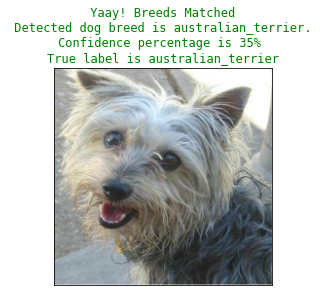

In [56]:
show_preds(prediction_proba=predictions,
         labels=val_labels,
         images=val_images,n=98)

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [58]:
complete_data=create_batches(x,y)

Please wait, working on Training Data batches...


In [59]:
full_model=create_model()

Building a model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4 model


In [60]:
final_model_callback=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)
full_model.fit(x=complete_data,
             epochs=NUM_EPOCHS,
             callbacks=[final_model_callback])

Epoch 1/100
320/320 [==============================] - 48s 140ms/step - loss: 1.3464 - accuracy: 0.6656
Epoch 2/100
320/320 [==============================] - 23s 73ms/step - loss: 0.3974 - accuracy: 0.8854
Epoch 3/100
320/320 [==============================] - 23s 72ms/step - loss: 0.2339 - accuracy: 0.9360
Epoch 4/100
320/320 [==============================] - 26s 80ms/step - loss: 0.1533 - accuracy: 0.9629
Epoch 5/100
320/320 [==============================] - 26s 80ms/step - loss: 0.1050 - accuracy: 0.9786
Epoch 6/100
320/320 [==============================] - 27s 86ms/step - loss: 0.0784 - accuracy: 0.9862
Epoch 7/100
320/320 [==============================] - 26s 82ms/step - loss: 0.0596 - accuracy: 0.9904
Epoch 8/100
320/320 [==============================] - 23s 73ms/step - loss: 0.0458 - accuracy: 0.9942
Epoch 9/100
320/320 [==============================] - 23s 72ms/step - loss: 0.0392 - accuracy: 0.9954
Epoch 10/100
320/320 [==============================] - 23s 71ms/step - 

In [61]:
import os
test_path='/kaggle/input/dog-breed-identification/test'
test_filenames=[test_path+fname for fname in os.listdir(test_path)]
test_filenames[:1]
#Image.open('/kaggle/input/dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg')

['/kaggle/input/dog-breed-identification/test09e51e17e2b756ff2ace8a87bd1443fa.jpg']

In [62]:
len(test_filenames)

10357

In [63]:
test_batch=create_batches(test_filenames,test_data=True)

Please wait, working on Test Data batches...


In [64]:
test_batch

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [65]:
#test_predictions=full_model.predict(test_batch, verbose=1)